First things first, let's set-up our environment:

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import *

%load_ext lab_black
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import re

plt.style.use(["seaborn-bright"])
plt.rcParams["figure.figsize"] = [20, 6]
from scipy import stats

from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


def ConfM(x):
    y = pd.DataFrame(
        x, columns=["Predicted No", "Predicted Yes"], index=["True No", "True Yes"]
    )
    return y

/home/jondufault/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Let's import the test and training data:

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

We want to create a random tree. Let's import the necessary libraries:




In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

This library requires we create two variables, one for the features array, and one for the response. Let's do that now.

In [4]:
train_y = np.ravel(train_data[["default.payment.next.month"]])
train_X = train_data.drop("default.payment.next.month", 1)

test_y = np.ravel(test_data[["default.payment.next.month"]])
test_X = test_data.drop("default.payment.next.month", 1)

In [5]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
model = decision_tree.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = model.predict(test_X)

accuracy = metrics.accuracy_score(test_y, y_pred)
accuracy = accuracy * 100
print("Accuracy: %.4g%%" % accuracy)

Accuracy: 72.17%


Confusion Matrix :
          Predicted No  Predicted Yes
True No           4460            208
True Yes           898            434
Accuracy Score : 0.8157
Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4668
           1       0.68      0.33      0.44      1332

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



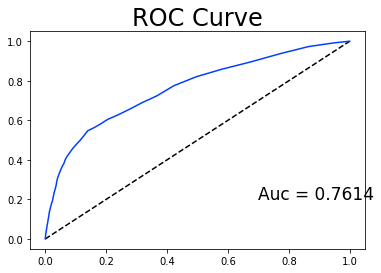

In [6]:
# The random forest model by itself
n_estimator = 50
rf = RandomForestClassifier(
    n_estimators=n_estimator, bootstrap=True, class_weight={1: 50, 0: 1}
)
rf.fit(train_X, np.ravel(train_y))
y_pred_rf = rf.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_rf)
auc_rf = metrics.auc(fpr_rf, tpr_rf)
y_predic_rf = rf.predict(test_X)
cm_rf = confusion_matrix(test_y, y_predic_rf)
print("Confusion Matrix :")
print(ConfM(cm_rf))
print("Accuracy Score : %.4g" % accuracy_score(test_y, y_predic_rf))
print("Report : ")
print(classification_report(test_y, y_predic_rf))
plt.figure(1)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_rf, tpr_rf, label="RF")
plt.title("ROC Curve", size=24)
plt.text(x=0.7, y=0.2, s="Auc = " + auc_rf.round(4).astype(str), size=17)
plt.show()

In [7]:
print(decision_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


Accuracy: 81.85%


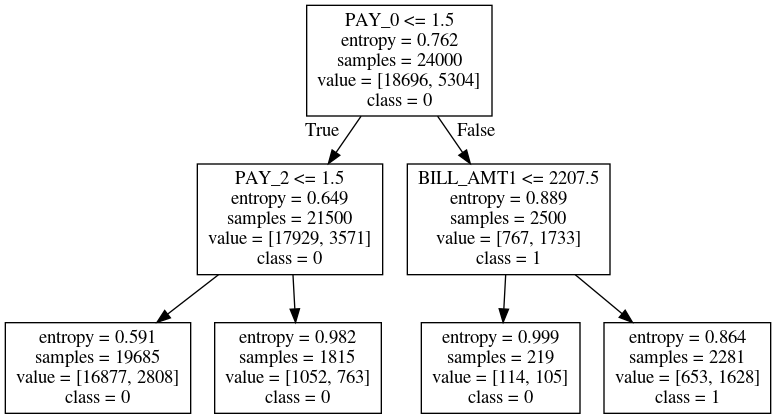

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create decision tree classifer object
decision_tree = DecisionTreeClassifier(
    random_state=3,
    criterion="entropy",
    splitter="best",
    max_depth=2,
    min_samples_split=100,
)

# Train Decision Tree Classifer
model = decision_tree.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = model.predict(test_X)

accuracy = metrics.accuracy_score(test_y, y_pred)
accuracy = accuracy * 100
print("Accuracy: %.4g%%" % accuracy)


# Train model
# model = clf.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(
    decision_tree,
    out_file="levon.dot",
    feature_names=list(test_X.columns),
    class_names=["0", "1"],
)

# Draw graph
graph = pydotplus.graph_from_dot_file("levon.dot")

# Show graph
Image(graph.create_png())

In [9]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
test_X.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [13]:
list(test_X.columns)

['Unnamed: 0',
 'ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [14]:
train_y

array([0, 1, 1, ..., 1, 0, 0])

In [15]:
train_X

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,13122,13122,240000,2,2,1,38,0,0,0,...,0,0,0,0,3004,0,0,0,0,0
1,12139,12139,50000,2,1,2,25,0,0,0,...,45452,45450,41154,39034,5000,2000,1500,2000,4000,1364
2,27321,27321,180000,1,1,1,41,1,2,2,...,119314,120882,117450,120398,6000,5100,5000,0,5000,5000
3,18639,18639,80000,2,1,2,25,-1,-1,2,...,690,6097,0,0,4830,0,6097,0,0,2169
4,6859,6859,30000,2,3,1,48,0,0,0,...,27899,29614,30127,29646,1751,1700,2500,1000,2000,4034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,16243,16243,360000,2,1,3,35,-2,-2,-2,...,0,0,0,6920,2570,0,0,0,6920,0
23996,15659,15659,200000,2,2,1,37,0,0,0,...,97400,4283,145769,143712,3952,4500,4283,148192,5133,5108
23997,9041,9041,20000,1,3,1,52,1,2,0,...,20148,19845,0,0,0,1200,397,0,0,0
23998,23988,23988,240000,1,2,2,26,0,0,0,...,27970,187880,169261,148519,10016,2081,169267,5062,4608,5096
